In [1]:
import os
import csv

path = {}
path['dir.dataroot'] =  os.path.join(os.getcwd(), '..', 'data')
path['dir.src_dataroot'] =  os.path.join(path['dir.dataroot'], 'srcdata', '20news-bydate')
path['train'] =  os.path.join(path['dir.src_dataroot'], '20news-bydate-train')
path['test'] =  os.path.join(path['dir.src_dataroot'], '20news-bydate-test')

pathCSV_root = os.path.join(path['dir.dataroot'], 'records_CSV')
datacsvname = os.path.join(pathCSV_root, 'dataExploration.csv')

with open(datacsvname, 'w') as datacsv:
    csv_fields = ['ID']
    csv_fields += os.listdir(path['train'])
    csv_writer = csv.DictWriter(datacsv, fieldnames=csv_fields)
    csv_writer.writeheader()
    for tpart in ['train', 'test']:
        rowdata = {'ID': tpart}
        for groupName in csv_fields[1:]:
            newsCount = len(os.listdir(os.path.join(path[tpart], groupName)))
            rowdata[groupName] = newsCount
        csv_writer.writerow(rowdata)



In [2]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from IPython.display import display
%matplotlib inline

df = pd.read_csv(datacsvname)
display(df)



,ID,rec.sport.hockey,misc.forsale,talk.politics.guns,comp.windows.x,sci.med,alt.atheism,comp.sys.mac.hardware,comp.os.ms-windows.misc,talk.politics.mideast,...,rec.autos,comp.graphics,rec.motorcycles,comp.sys.ibm.pc.hardware,soc.religion.christian,sci.electronics,sci.space,rec.sport.baseball,talk.religion.misc,sci.crypt
0,train,600,585,546,593,594,480,578,591,564,...,594,584,598,590,599,591,593,597,377,595
1,test,399,390,364,395,396,319,385,394,376,...,396,389,398,392,398,393,394,397,251,396


In [3]:
display(df[df['ID']=='train'])

,ID,rec.sport.hockey,misc.forsale,talk.politics.guns,comp.windows.x,sci.med,alt.atheism,comp.sys.mac.hardware,comp.os.ms-windows.misc,talk.politics.mideast,...,rec.autos,comp.graphics,rec.motorcycles,comp.sys.ibm.pc.hardware,soc.religion.christian,sci.electronics,sci.space,rec.sport.baseball,talk.religion.misc,sci.crypt
0,train,600,585,546,593,594,480,578,591,564,...,594,584,598,590,599,591,593,597,377,595


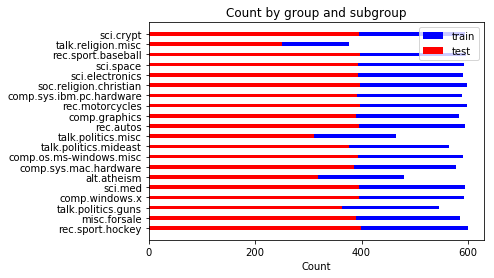

In [4]:
# Refs:
# http://matplotlib.org/mpl_examples/pylab_examples/bar_stacked.py
# http://matplotlib.org/api/pyplot_api.html#matplotlib.pyplot.barh

N = len(df.columns)-1

data_train = df[df['ID'] == 'train'].drop('ID', axis=1)
data_test = df[df['ID'] == 'test'].drop('ID', axis=1)

# print data_train.values

ind = np.arange(N)    # the x locations for the groups
width = 0.35       # the width of the bars: can also be len(x) sequence
height = 0.35

p_train = plt.barh(ind, tuple(data_train.values[0]), height, color='blue')
p_test = plt.barh(ind, tuple(data_test.values[0]), height, color='red')

plt.xlabel('Count')
plt.title('Count by group and subgroup')
plt.yticks(ind,  tuple(os.listdir(path['train'])))
plt.xticks(np.arange(0, 800, 200))
plt.legend((p_train[0], p_test[0]), ('train', 'test'))

plt.show()


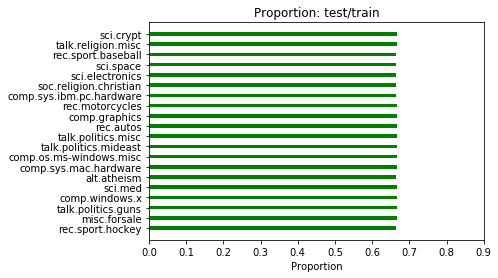

In [5]:
# show the proportion of every category

props = []
for cate in os.listdir(path['train']):
    prop = float(list(data_test[cate])[0])/list(data_train[cate])[0]
    props.append(prop)
   
props = np.array(props)


ind = np.arange(20)
height = 0.35
p_props_testVStrain = plt.barh(ind, tuple(props), height, color='green')

plt.xlabel('Proportion')
plt.title('Proportion: test/train')
plt.yticks(ind, tuple(os.listdir(path['train'])))
plt.xticks(np.arange(0, 1, 0.1))

plt.show()

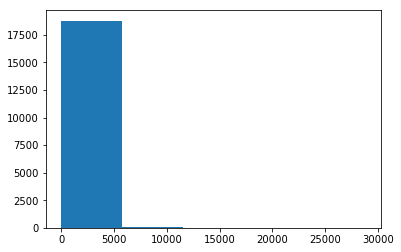

In [6]:
# Statistics for word-count

# path['dir.dataroot'] =  os.path.join(os.getcwd(), '..', 'data')
path['dir.train'] = os.path.join(path['dir.dataroot'], 'trialdata', 'train')
path['dir.test'] = os.path.join(path['dir.dataroot'], 'trialdata', 'test')

wordcount = []
for tpart in ['dir.train', 'dir.test']:
    dirpath = path[tpart]
    for cls in os.listdir(dirpath):
        clspath = os.path.join(dirpath, cls)
        files = os.listdir(clspath)
        for f in files:
            fpath = os.path.join(clspath, f)
            with open(fpath, 'r', encoding="latin-1") as fpath_f:
                tmpFileStr = fpath_f.read()
            tmpFileStr = tmpFileStr.split()
            wordcount.append(len(tmpFileStr))

tn, tb, tp = plt.hist(wordcount, bins=5)

In [7]:
wc_stat = pd.DataFrame(wordcount)
display(wc_stat.describe())


,0
count,18846.000000
mean,304.488061
std,696.973851
min,14.000000
25%,112.000000
50%,178.000000
75%,293.000000
max,28841.000000


In [8]:
wcdict = {}
col_labels = ['[0, {})'.format(tb[0])]
col_labels += ['[{}, {})'.format(tb[i-1], tb[i]) for i in range(1, len(tb))]
col_labels.append('[{}, +inf)'.format(tb[-1]))

wcdict[col_labels[0]] = len(wc_stat[wc_stat[0] < tb[0]])
for i in range(len(tb)-1):
    wcdict[col_labels[i+1]] = len(wc_stat[(tb[i] <= wc_stat[0]) & (wc_stat[0] < tb[i+1])])

wcdict[col_labels[-1]] = len(wc_stat[wc_stat[0] >= tb[-1]])
    
wc_sp = pd.DataFrame(wcdict, index=['count'], columns=col_labels)
display(wc_sp)

,"[0, 14.0)","[14.0, 5779.4)","[5779.4, 11544.8)","[11544.8, 17310.199999999997)","[17310.199999999997, 23075.6)","[23075.6, 28841.0)","[28841.0, +inf)"
count,0,18779,55,11,0,0,1


In [9]:
dict_outlier = {}
ct = 0
for tpart in ['dir.train', 'dir.test']:
    dirpath = path[tpart]
    for cls in os.listdir(dirpath):
        dict_outlier[cls] = [0, 0] if ('dir.train' == tpart) else dict_outlier[cls]
        clspath = os.path.join(dirpath, cls)
        files = os.listdir(clspath)
        for f in files:
            fpath = os.path.join(clspath, f)
            with open(fpath, 'r', encoding="latin-1") as fpath_f:
                tmpFileStr = fpath_f.read()
            tmpFileStr = tmpFileStr.split()
            if (len(tmpFileStr) >= tb[1]):
                x = 0 if ('dir.train' == tpart) else 1
                dict_outlier[cls][x] += 1

df_outlier = pd.DataFrame(dict_outlier, index=['train', 'test'])
display(df_outlier)

,alt.atheism,comp.graphics,comp.os.ms-windows.misc,comp.sys.ibm.pc.hardware,comp.sys.mac.hardware,comp.windows.x,misc.forsale,rec.autos,rec.motorcycles,rec.sport.baseball,rec.sport.hockey,sci.crypt,sci.electronics,sci.med,sci.space,soc.religion.christian,talk.politics.guns,talk.politics.mideast,talk.politics.misc,talk.religion.misc
train,1,4,19,0,1,7,0,0,0,0,2,4,1,0,1,0,2,4,4,0
test,0,6,1,0,1,4,0,0,0,0,0,0,0,0,1,0,0,2,1,1


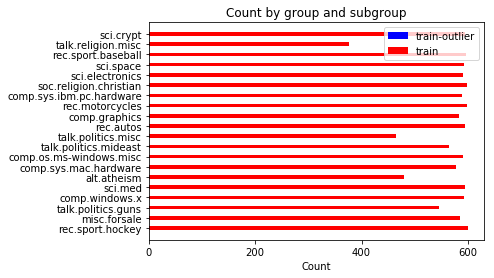

In [10]:
# Refs:
# http://matplotlib.org/mpl_examples/pylab_examples/bar_stacked.py
# http://matplotlib.org/api/pyplot_api.html#matplotlib.pyplot.barh

N = len(df.columns)-1

# print data_train.values

ind = np.arange(N)    # the x locations for the groups
width = 0.35       # the width of the bars: can also be len(x) sequence
height = 0.35

# df_outlier_train = df_outlier.drop('test')
p_train_outlier = plt.barh(ind, tuple(df_outlier.drop('test').values[0]), height, color='blue')
p_train = plt.barh(ind, tuple(data_train.values[0]), height, color='red')

plt.xlabel('Count')
plt.title('Count by group and subgroup')
plt.yticks(ind,  tuple(os.listdir(path['train'])))
plt.xticks(np.arange(0, 800, 200))
plt.legend((p_train_outlier[0], p_train[0]), ('train-outlier', 'train'))

plt.show()


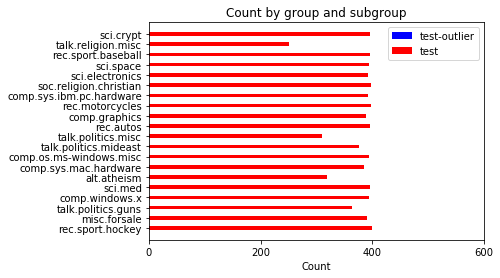

In [11]:
# Refs:
# http://matplotlib.org/mpl_examples/pylab_examples/bar_stacked.py
# http://matplotlib.org/api/pyplot_api.html#matplotlib.pyplot.barh

N = len(df.columns)-1

# print data_train.values

ind = np.arange(N)    # the x locations for the groups
width = 0.35       # the width of the bars: can also be len(x) sequence
height = 0.35

# df_outlier_train = df_outlier.drop('test')
p_test_outlier = plt.barh(ind, tuple(df_outlier.drop('train').values[0]), height, color='blue')
p_test = plt.barh(ind, tuple(data_test.values[0]), height, color='red')

plt.xlabel('Count')
plt.title('Count by group and subgroup')
plt.yticks(ind,  tuple(os.listdir(path['train'])))
plt.xticks(np.arange(0, 800, 200))
plt.legend((p_test_outlier[0], p_test[0]), ('test-outlier', 'test'))

plt.show()


In [12]:
outlierCSV = 'outlierDistribution.csv'
df_outlier.to_csv(os.path.join(pathCSV_root, outlierCSV))

In [13]:
print('train[comp.os.ms-windows.misc]: ', data_train.iloc[0]['comp.os.ms-windows.misc'])
print('proportion: ', df_outlier.loc['train']['comp.os.ms-windows.misc'] / data_train.iloc[0]['comp.os.ms-windows.misc'])

train[comp.os.ms-windows.misc]:  591
proportion:  0.0321489001692
